<a href="https://colab.research.google.com/github/octaviobedregal/maestria/blob/master/Practica02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Generación de Puntos (100)**

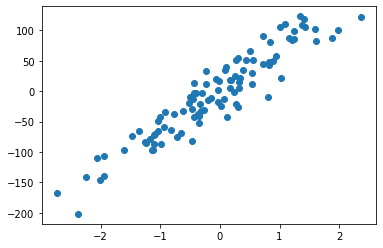

In [83]:
import pylab as pl
import numpy as np
from sklearn import datasets
X, Y = datasets.make_regression(n_samples = 100, n_features=1, noise=20)
pl.scatter(X,Y)
pl.show()

# **2. Aplicación de Mínimos cuadrados**

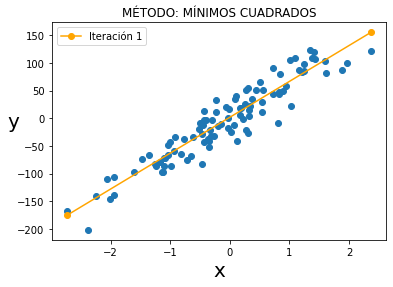

w1: 64.837094
w0: 1.785599


In [138]:

f = open ('Archivo1.txt','w')
f.write('ALUMNO: Octavio Bedregal Flores\n')
f.write('METODO: Mínimos cuadrados\n')
f.write('\nDATOS UTILIZADOS:\n')

sumX = 0;
sumY = 0;
sumXY = 0;
sumX2 = 0;
n = X.size;

for i in range(n):
  x = X[i][0];
  y = Y[i];
  f.write(str(round(x,6))+ '    ' + str(round(y,6)) + '\n')
  sumX += x;
  sumY += y;
  sumXY += x*y;
  sumX2 += x**2;

f.write("\nSUMA DE VALORES DE X: "+str(round(sumX,6))+ '\n')
f.write("SUMA DE VALORES DE Y: "+str(round(sumY,6))+ '\n')
f.write("SUMA DE VALORES DE X*Y: "+str(round(sumXY,6))+ '\n')
f.write("SUMA DE VALORES DE X2: "+str(round(sumX2,6))+ '\n')

w1 = ((n*sumXY) - (sumX*sumY))/ ((n*sumX2) - (sumX**2));
w0 = (sumY-(m*(sumX)))/n

f.write("\nPENDIENTE: "+str(round(w1,6))+ '\n')
f.write("INTERCEPTO: "+str(round(w0,6))+ '\n')
f.close()

pxMin = min(X);
pyMin = w1*pxMin + w0
pxMax = max(X);
pyMax = w1*pxMax + w0

pl.scatter(X,Y)

pl.plot([pxMin,pxMax], [pyMin, pyMax], marker="o", color="orange", label = "Iteración 1")

pl.title("MÉTODO: MÍNIMOS CUADRADOS")
pl.xlabel("x", fontsize=20)
pl.ylabel("y", rotation=0, fontsize=20)
pl.legend()
pl.show()

print("w1: " + str(round(w1,6)))
print("w0: " + str(round(w0,6)))

# **3. Aplicación de Gradiente Descendiente**

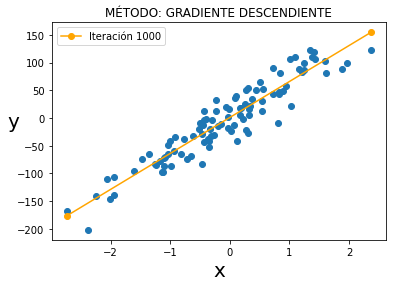

Iteraciones = 1000
Rate = 0.001
Last slope = 64.837094
Last intercept = 0.965157


In [143]:
f = open ('Archivo2.txt','w')
f.write('ALUMNO: Octavio Bedregal Flores\n')
f.write('METODO: Gradiente Descendiente\n')
f.write('\nDATOS UTILIZADOS:\n')

for i2 in range(n):
  x = X[i2][0];
  y = Y[i2];
  f.write(str(round(x,6))+ '    ' + str(round(y,6)) + '\n')

intercept = -100
slope = 0
rate = 0.001

for i in range(1, 1001):
  f.write('\nITERACION '+ str(i) +':\n')
  interceptT = 0;
  slopeT = 0;
  for i2 in range(n):
    x = X[i2][0];
    y = Y[i2];
    interceptT += -2*(y - (intercept + slope*x));
    slopeT += -2*x*(y - (intercept + slope*x));
  f.write('PENDIENTE ANTERIOR = '+ str(round(slope,6)) +'\n')
  f.write('INTERCEPTO ANTERIOR = '+ str(round(intercept,6)) +'\n')
  f.write('TASA DE APRENDIZAJE = '+ str(rate) +'\n')
  f.write('DERIVADA INTERCEPTO = '+ str(interceptT) +'\n')
  f.write('DERIVADA PENDIENTE = '+ str(slopeT) +'\n')
  intercept = intercept - (interceptT * rate);
  slope = slope - (slopeT * rate);
  f.write('PENDIENTE NUEVA = '+ str(round(slope,6)) +'\n')
  f.write('INTERCEPTO NUEVA = '+ str(round(intercept,6)) +'\n')

f.close()

pxMin = min(X);
pyMin = slope*pxMin + intercept
pxMax = max(X);
pyMax = slope*pxMax + intercept

pl.scatter(X,Y)
pl.plot([pxMin,pxMax], [pyMin, pyMax], marker="o", color="orange", label = "Iteración 1000")
pl.title("MÉTODO: GRADIENTE DESCENDIENTE")
pl.xlabel("x", fontsize=20)
pl.ylabel("y", rotation=0, fontsize=20)
pl.legend()
pl.show()
print('Iteraciones = 1000')
print('Rate = '+ str(rate))
print('Last slope = '+ str(round(slope,6)))
print('Last intercept = '+ str(round(intercept,6)))